   # CLUSTERING ALGORITHM FOR WIRELESS SENSORY NODES FOR DISTRIBUTED COMPUTATION OF DRQN
   
   ### This algo works in following way:
   #### 1] Pick a random node from the set.
   #### 2] This node connects to the nearest 3 neighbors.
   #### 3] Set the virtual distance to infinity for these nodes.
   #### 4] Repeat step 2 and step 3 untill all the nodes are assigned.
  
  ### There are two methods to execute this; DFS and BFS
  

In [77]:
import random 
import matplotlib.pyplot as plt
import numpy as np
import operator
from collections import deque

## set parameters here: 

In [104]:
nodes = 10 #number of nodes on the canvas
infi = 10000 #infinity: set this value more than W* root(2) i.e. max possible distance on canvas
W = 80 #width of the canvas
CoverageRadius = 6 #coverage radius of a node, this is not taken into computation but used for plotting 
PosOfNodes = [] #creates list of nodes

## function : generate_nodes on random positions on canvas of width 'W'

In [105]:
def generate_nodes():
    for i in range((nodes)):
        x = random.randint(0,W)
        y = random.randint(0,W)
        pnt = (x,y)
        PosOfNodes.append(pnt)
        
    print(PosOfNodes)
    

In [106]:
generate_nodes()

[(80, 58), (46, 31), (41, 48), (5, 20), (37, 27), (27, 37), (25, 64), (67, 9), (67, 58), (17, 39)]


## Run the cell below to generate a StartNode which act as propogating point of clustering

In [107]:
StartNode = random.randint(1,nodes)
StartNode

8

## Function : convert list of points to dictionary

In [108]:
def generate_position_dict():
    positions = dict()
    for i in PosOfNodes:
        p = dict()
        for j in PosOfNodes:
            if i[0] == j[0]:
                p[j[1]] = 0
        positions[i[0]] = p
    
    print(positions)
    


## function call : generate_position_dict

In [109]:
generate_position_dict()

{80: {58: 0}, 17: {39: 0}, 67: {9: 0, 58: 0}, 5: {20: 0}, 25: {64: 0}, 41: {48: 0}, 27: {37: 0}, 46: {31: 0}, 37: {27: 0}}


## Function : plot fully connected graph for all nodes

In [110]:
def plot_fc():
    N = nodes
    x = np.zeros(N)
    y = np.zeros(N)
    for i in range(nodes):
        x[i] = PosOfNodes[i][0]
        y[i] = PosOfNodes[i][1]

    colors = np.random.rand(N)
    area = (CoverageRadius*2)**2  # 0 to 15 point radii



    for i in PosOfNodes:
        plt.text(i[0],i[1],i)
        for j in PosOfNodes:
            plt.plot([i[0], j[0]], [i[1], j[1]],'black',lw='0.01')

    #print(PosOfNodes[2],PosOfNodes[3])
    #plt.plot([PosOfNodes[2][0], PosOfNodes[3][0]], [PosOfNodes[2][1], PosOfNodes[3][1]])
    plt.scatter(x, y, s=area, c=colors, alpha=0.5)
    plt.show()


## plots fully connected graph

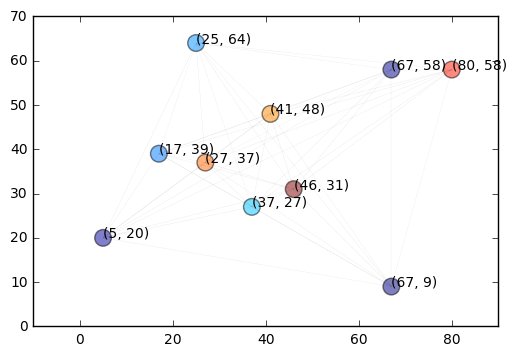

In [111]:
plot_fc()

In [113]:
q = deque()


In [114]:
def dist(a,b):
    return ((a[0]-b[0])**2 + (a[1]-b[1])**2) ** (1/2.0) 

# a and b are in form of:
#a = (3,4)
#b = (5,8)


## function : create distance matrix 

In [115]:
distance_matrix = {}
row = {}

def create_dist_mat(PosOfNodes):
    print(PosOfNodes)
    for i in PosOfNodes:
        print(i)
        row = {}
        for j in PosOfNodes:
            row[j] = dist(i,j)
        distance_matrix[i] = row
        
    print(distance_matrix)

## function call : create_dist_mat

In [116]:
create_dist_mat(PosOfNodes)

[(80, 58), (46, 31), (41, 48), (5, 20), (37, 27), (27, 37), (25, 64), (67, 9), (67, 58), (17, 39)]
(80, 58)
(46, 31)
(41, 48)
(5, 20)
(37, 27)
(27, 37)
(25, 64)
(67, 9)
(67, 58)
(17, 39)
{(5, 20): {(5, 20): 0.0, (25, 64): 48.33218389437829, (46, 31): 42.44997055358225, (80, 58): 84.07734534343957, (17, 39): 22.47220505424423, (37, 27): 32.7566787083184, (67, 58): 72.71863585079137, (27, 37): 27.80287754891569, (67, 9): 62.96824596572466, (41, 48): 45.60701700396552}, (25, 64): {(5, 20): 48.33218389437829, (25, 64): 0.0, (46, 31): 39.11521443121589, (80, 58): 55.326304774492215, (17, 39): 26.248809496813376, (37, 27): 38.897300677553446, (67, 58): 42.42640687119285, (27, 37): 27.073972741361768, (67, 9): 69.20260110718382, (41, 48): 22.627416997969522}, (46, 31): {(5, 20): 42.44997055358225, (25, 64): 39.11521443121589, (46, 31): 0.0, (80, 58): 43.41658669218482, (17, 39): 30.083217912982647, (37, 27): 9.848857801796104, (67, 58): 34.20526275297414, (27, 37): 19.924858845171276, (67, 9)

## set values of cluster_assigned and cluster_head to 1 with length of nodes

In [117]:
cluster_head = np.ones(nodes)
cluster_assigned = np.ones(nodes)

## set value of StartNode to infinity (this positions the node to virtually infinite distance)

In [118]:
def reset():
    cluster_head = np.ones(nodes)
    cluster_assigned = np.ones(nodes)
    
    cluster_head[StartNode] = infi
    cluster_assigned[StartNode] = infi

    #cluster_assigned, cluster_head
    
    

In [119]:
reset()

In [120]:
sums = 0
cluster = {}

In [121]:
def connect_dfs(q,sums):
    
    check_it = (infi*nodes)
    if(int(sums) == int(check_it)):
           return None
    print(check_it)
    while(len(q)>0):
        
        var = q.popleft()
        print(var)
        connected = deque()
        #sorted_x = sorted(distance_matrix[var].items(), key=operator.itemgetter(1))
        d = {}
        for i in range(nodes):
            d[i] = distance_matrix[PosOfNodes[var]][PosOfNodes[i]]
        #print(d)  
        
        for i in range(nodes):
            d[i] = d[i] * cluster_assigned[i]
        #print(d)
        
        sorted_x = sorted(d.items(), key=operator.itemgetter(1))
        #print(sorted_x)
        
        connected.append(sorted_x[1][0])
        connected.append(sorted_x[2][0])
        connected.append(sorted_x[3][0])
        cluster[var] = list(connected)
        cluster_assigned[sorted_x[1][0]] = infi
        cluster_assigned[sorted_x[2][0]] = infi
        cluster_assigned[sorted_x[3][0]] = infi
        print(cluster_assigned)
        sums = np.sum(cluster_assigned)
        print(connected)
        print('sums',sums)
        if(int(sums) == int(check_it)):
           break
        connect_dfs(connected,sums)
        
    
    return sums
    

In [122]:
q.append(StartNode)
q

deque([8])

In [123]:
def connect_bfs(q):
    sums = 0
    check_it = float(infi*nodes)
    print('check_it',check_it)
    var = 0
    print('len of q', len(q))
    while(len(q)>0):
        print('bfs')
        connected = deque()
        
        var = q.popleft()
        print('var',var)
        
        d = {}
        for i in range(nodes):
            d[i] = distance_matrix[PosOfNodes[var]][PosOfNodes[i]]
        #print('d',d)  
        
        for i in range(nodes):
            d[i] = d[i] * cluster_assigned[i]
        #print('d',d)
        
        sorted_x = sorted(d.items(), key=operator.itemgetter(1))
        #print(sorted_x)
        
        connected.append(sorted_x[1][0]) 
        connected.append(sorted_x[2][0])
        connected.append(sorted_x[3][0])
        
        cluster[var] = list(connected)
        print(cluster)
        cluster_assigned[sorted_x[1][0]] = infi
        cluster_assigned[sorted_x[2][0]] = infi
        cluster_assigned[sorted_x[3][0]] = infi
        print('CA',cluster_assigned)
        sums = np.sum(cluster_assigned)
        
        print('connected',connected)
        print('sums',sums)
        if(int(sums) == int(check_it)):
           break
    
    if(int(sums) == int(check_it)):
           return None
    
    connect_bfs(connected)
    print('recc')
    #return sums
    

In [143]:
def plot_cluster():
    N = nodes
    x = np.zeros(N)
    y = np.zeros(N)
    for i in range(nodes):
        x[i] = PosOfNodes[i][0]
        y[i] = PosOfNodes[i][1]

    colors = np.random.rand(N)
    area = (CoverageRadius*2)**2  # 0 to 15 point radii



    for i in cluster:
        plt.text(PosOfNodes[i][0],PosOfNodes[i][1],i, fontsize=20)
        for j in cluster[i]:
            plt.text(PosOfNodes[j][0],PosOfNodes[j][1],j, fontsize=12)
            plt.plot([PosOfNodes[i][0], PosOfNodes[j][0]], [PosOfNodes[i][1], PosOfNodes[j][1]],'black',lw='0.5')

    #print(PosOfNodes[2],PosOfNodes[3])
    #plt.plot([PosOfNodes[2][0], PosOfNodes[3][0]], [PosOfNodes[2][1], PosOfNodes[3][1]])
    plt.scatter(x, y, s=area, c=colors, alpha=0.5)
    plt.show()


In [125]:
def run_dfs_cluster():
    
    q.append(StartNode)
    reset()
    connect_dfs(q,sums)
    plot_cluster()
    


In [126]:
def run_bfs_cluster():
    
    q.append(StartNode)
    reset()
    connect_bfs(q)
    plot_cluster()

check_it 100000.0
len of q 1
bfs
var 8
{8: [0, 2, 1], 4: [7, 1, 5], 6: [9, 8, 3]}
CA [ 10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.
  10000.]
connected deque([0, 2, 1])
sums 100000.0


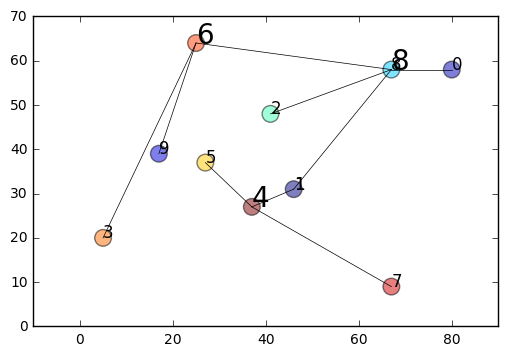

In [144]:
run_bfs_cluster()

In [ ]:
run_dfs_cluster()